In [1]:
import numpy as np
from qiskit import __version__, QuantumCircuit
from qiskit.visualization import array_to_latex, plot_histogram
from qiskit.quantum_info import Statevector, Operator
from numpy import sqrt

In [2]:
__version__

'2.3.0'

In [3]:
import sys
!{sys.executable} -m pip list | grep qiskit


qiskit                    2.3.0
qiskit-ibm-runtime        0.45.1

[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [4]:
 
ket0 = np.array([[1], [0]])
ket1 = np.array([[0], [1]])
 
print(ket0 / 2 + ket1 / 2)

[[0.5]
 [0.5]]


In [5]:
M1 = np.array([[1, 1], [0, 0]])
M2 = np.array([[1, 0], [0, 1]])
M = M1 / 2 + M2 / 2
print(M)

[[1.  0.5]
 [0.  0.5]]


In [6]:
print(np.matmul(M1, ket1))
print(np.matmul(M1, M2))
print(np.matmul(M, M))

[[1]
 [0]]
[[1 1]
 [0 0]]
[[1.   0.75]
 [0.   0.25]]


In [7]:
display(array_to_latex(np.matmul(M1, ket1)))
display(array_to_latex(np.matmul(M1, M2)))
display(array_to_latex(np.matmul(M, M)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [8]:
u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

In [9]:
display(u.draw("text"))
display(u.draw("latex"))
print(u.draw("latex_source"))

[0.70710678+0.j,0.70710678+0.j]

<IPython.core.display.Latex object>

\frac{\sqrt{2}}{2} |0\rangle+\frac{\sqrt{2}}{2} |1\rangle


In [10]:
display(u.is_valid())
display(w.is_valid())

True

False

In [11]:
display(v.draw("latex"))

<IPython.core.display.Latex object>

In [12]:
outcome, state = v.measure()
print(f"Measured: {outcome}\nPost-measurement state:")
display(state.draw("latex"))

Measured: 1
Post-measurement state:


<IPython.core.display.Latex object>

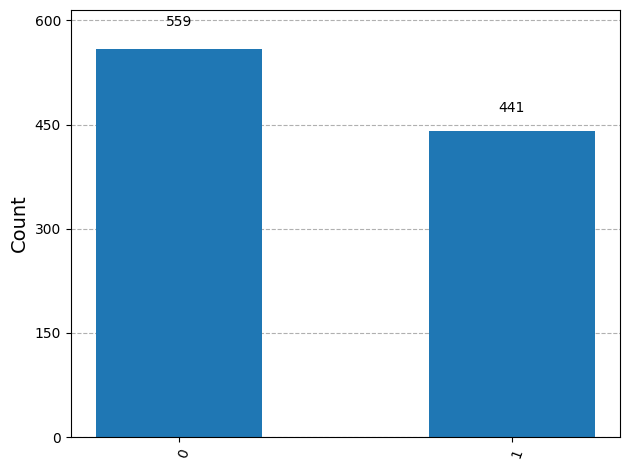

In [13]:
statistics = v.sample_counts(1000)
plot_histogram(statistics)

In [14]:
Y = Operator([[0, -1.0j], [1.0j, 0]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

display(T.draw("latex"))

<IPython.core.display.Latex object>

In [15]:
v = Statevector([1, 0])
 
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(S)
v = v.evolve(Y)
 
display(v.draw("latex"))

<IPython.core.display.Latex object>

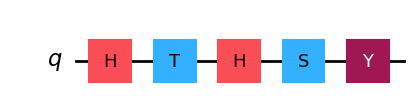

In [16]:
circuit = QuantumCircuit(1)
 
circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.s(0)
circuit.y(0)
 
display(circuit.draw(output="mpl"))

In [17]:
display(Operator.from_circuit(circuit).draw("latex"))

<IPython.core.display.Latex object>

In [18]:
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
display(v.draw("latex"))

<IPython.core.display.Latex object>

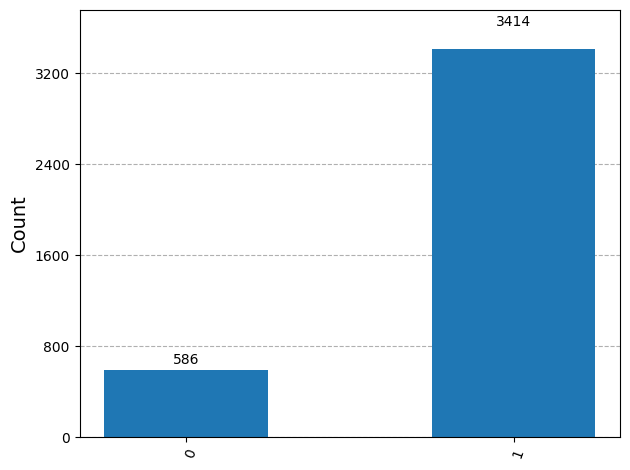

In [19]:
statistics = v.sample_counts(4000)
display(plot_histogram(statistics))

In [20]:
zero = Statevector.from_label("0")
one = Statevector.from_label("1")
psi = zero.tensor(one)
display(psi.draw("latex"))

<IPython.core.display.Latex object>

In [21]:
plus = Statevector.from_label("+")
minus_i = Statevector.from_label("l")
phi = plus.tensor(minus_i)
display(phi.draw("latex"))

<IPython.core.display.Latex object>

In [22]:
display((plus ^ minus_i).draw("latex"))

<IPython.core.display.Latex object>

In [23]:
H = Operator.from_label("H")
Id = Operator.from_label("I")
X = Operator.from_label("X")
display(H.tensor(Id).draw("latex"))
display(H.tensor(Id).tensor(X).draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [24]:
display((H ^ Id ^ X).draw("latex"))

<IPython.core.display.Latex object>

In [25]:
display(phi.evolve(H ^ Id).draw("latex"))

<IPython.core.display.Latex object>

In [26]:
CX = Operator([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])
psi = plus.tensor(zero)
display(psi.evolve(CX).draw("latex"))

<IPython.core.display.Latex object>

In [27]:
w = Statevector([0, 1, 1, 0, 1, 0, 0, 0] / sqrt(3))
display(w.draw("latex"))
 
result, state = w.measure([0])
print(f"Measured: {result}\nState after measurement:")
display(state.draw("latex"))
 
result, state = w.measure([0, 1])
print(f"Measured: {result}\nState after measurement:")
display(state.draw("latex"))

<IPython.core.display.Latex object>

Measured: 0
State after measurement:


<IPython.core.display.Latex object>

Measured: 00
State after measurement:


<IPython.core.display.Latex object>